In [59]:
import importlib
import os
import logging
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from params import Params
import params
importlib.reload(params)

import cache
importlib.reload(cache)


#logging.basicConfig(encoding='utf-8', level=logging.DEBUG)
import embeddings_base
importlib.reload(embeddings_base)

import rwkv_runner
importlib.reload(rwkv_runner)
from rwkv_runner import rwkv
importlib.reload(rwkv_runner)
from source_file_iterator import SourceFileIterator
import source_file_iterator
importlib.reload(source_file_iterator)

modelname = 'RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth'

os.environ["RWKV_CUDA_ON"] = '1'
r = rwkv(modelname,
         '20B_tokenizer.json',
         model_load=False)

iter = SourceFileIterator(r.data_top_dir, r.data_subdirs, r.numTokensList)
dfs = []
for out in iter:
    file = out[0][1]
    numTokens = out[1][1]
    with open(file, "rb") as f:
        emb = r.getHeadPersistenceDiagramEmbeddings(f, numTokens)
    df = pd.DataFrame(emb)
    dfs.append(df)
    #df['size']=0.01
dfs[0] # [2, n]のベクトル群から1次元に変換されている

embeddings_base_logger= <Logger embeddings_base (INFO)>
<class 'tokenizers.Tokenizer'>
tokenizer class= <class 'tokenizers.Tokenizer'>
key_prefix= rwkv:RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth:Tokenizer


,0
0,7722.641003
1,10627.261093


In [6]:
pd.DataFrame(np.array(dfs[0]).reshape(2, -1))

,0,1,2,3,4,5,6,7,8,9
0,512.470542,545.003132,846.254542,1357.438486,1415.779834,1487.983252,3595.379032,5805.533942,7722.641003,104654.442219
1,1261.466941,1221.047992,1490.449382,2042.479965,2082.489512,2163.259305,4622.300126,6469.631401,10627.261093,105543.211802


data_subdirs= ['carroll', 'einstein', 'lovecraft']
numTokensList= [1024, 2048, 4096]
INFO: 2023-09-05 10:38:25,193 - matplotlib.font_manager.set_size - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt (font_manager.py:832)


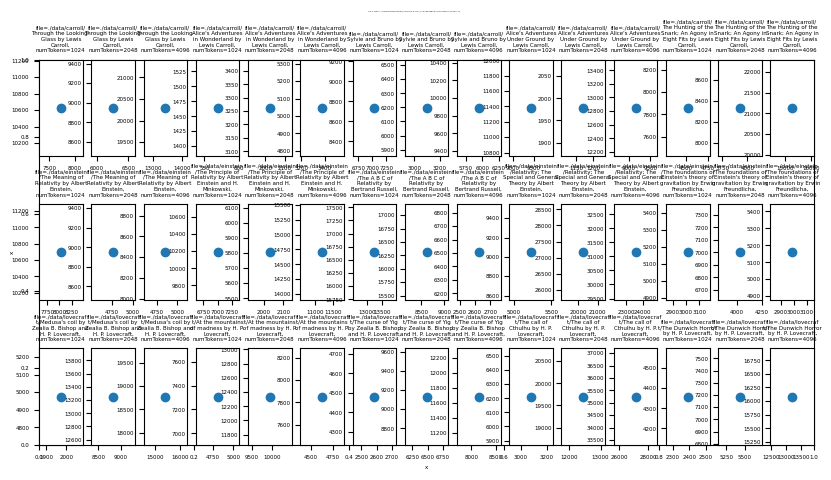

In [60]:
r.all_pd_plot()

- フルプロット

<class 'tokenizers.Tokenizer'>
tokenizer class= <class 'tokenizers.Tokenizer'>
key_prefix= rwkv:RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth:Tokenizer
data_subdirs= ['carroll', 'einstein', 'lovecraft']
numTokensList= [1024]
INFO: 2023-09-05 14:24:23,857 - matplotlib.font_manager.set_size - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt (font_manager.py:832)


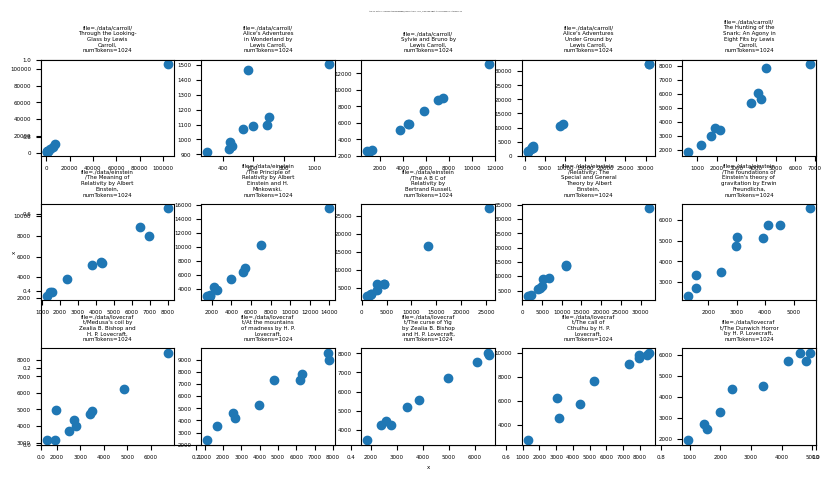

In [102]:
import rwkv_runner
importlib.reload(rwkv_runner)
from rwkv_runner import rwkv
r = rwkv(modelname,
         '20B_tokenizer.json',
         model_load=False)
r.numTokensList=[1024]
r.topN = 10
r.all_pd_plot()

data_subdirs= ['carroll', 'einstein', 'lovecraft']
numTokensList= [1024]
INFO: 2023-09-05 13:30:57,844 - matplotlib.font_manager.set_size - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt (font_manager.py:832)


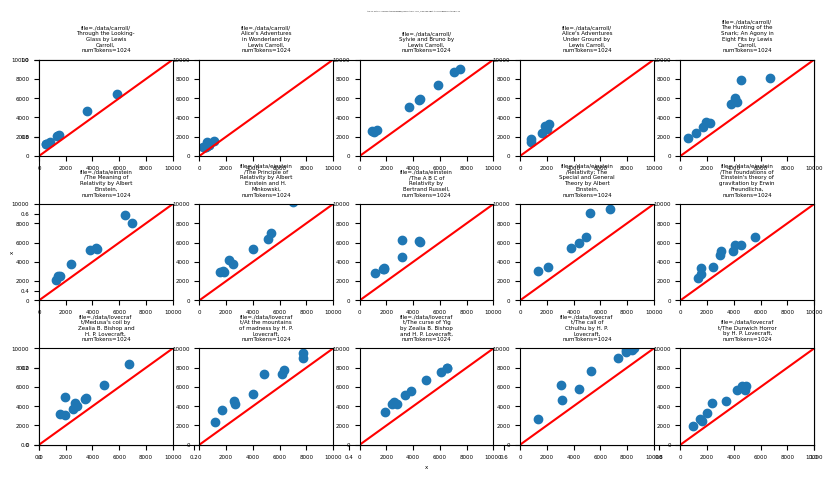

In [79]:
r.numTokensList=[1024]
r.topN=10
r.all_pd_plot() # max_val指定無し

<class 'tokenizers.Tokenizer'>
tokenizer class= <class 'tokenizers.Tokenizer'>
key_prefix= rwkv:RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth:Tokenizer
data_subdirs= ['carroll', 'einstein', 'lovecraft']
numTokensList= [1024]


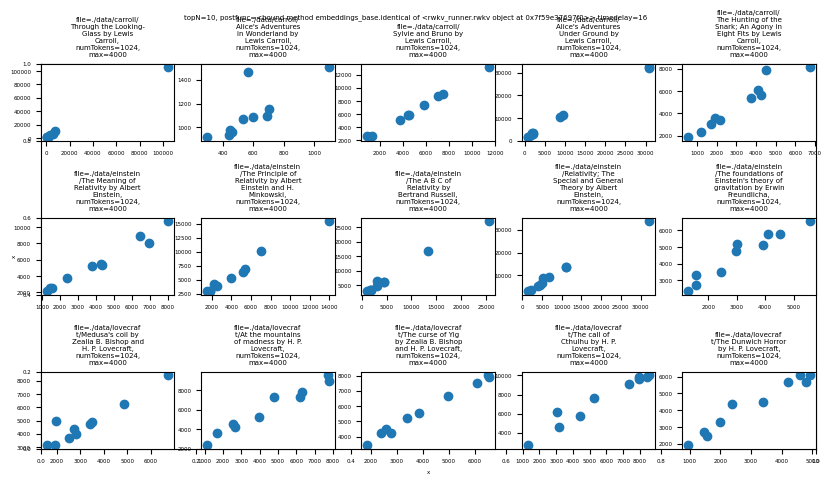

In [118]:
import rwkv_runner
importlib.reload(rwkv_runner)
from rwkv_runner import rwkv
r = rwkv(modelname,
         '20B_tokenizer.json',
         model_load=False)
r.numTokensList=[1024]
r.topN=10
r.all_pd_plot() # max_val = 4000

# - プロット範囲を変える実験

<class 'tokenizers.Tokenizer'>
tokenizer class= <class 'tokenizers.Tokenizer'>
key_prefix= rwkv:RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth:Tokenizer
data_subdirs= ['carroll', 'einstein', 'lovecraft']
numTokensList= [1024]


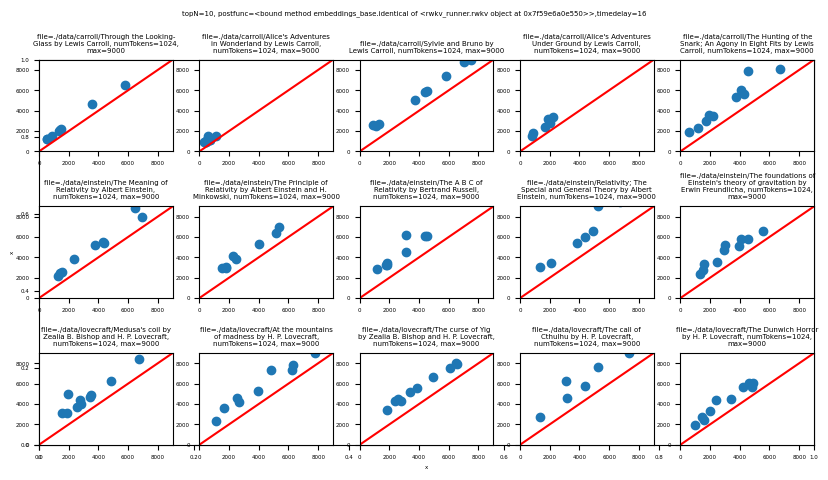

In [130]:
import rwkv_runner
importlib.reload(rwkv_runner)
from rwkv_runner import rwkv
r = rwkv(modelname,
         '20B_tokenizer.json',
         model_load=False)
r.numTokensList=[1024]
r.topN=10
r.all_pd_plot() # max_val = 9000

<class 'tokenizers.Tokenizer'>
tokenizer class= <class 'tokenizers.Tokenizer'>
key_prefix= rwkv:RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth:Tokenizer
data_subdirs= ['carroll', 'einstein', 'lovecraft']
numTokensList= [1024]


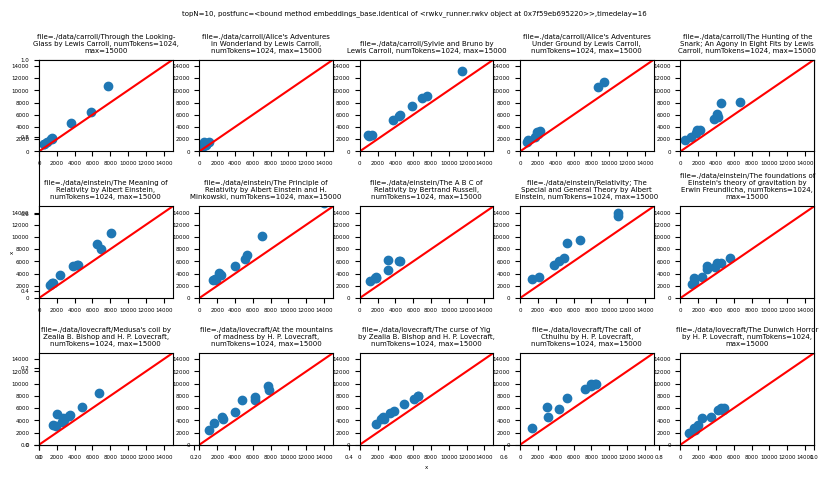

In [127]:
import rwkv_runner
importlib.reload(rwkv_runner)
from rwkv_runner import rwkv
r = rwkv(modelname,
         '20B_tokenizer.json',
         model_load=False)
r.numTokensList=[1024]
r.topN=10
r.all_pd_plot() # max_val = 15000

<class 'tokenizers.Tokenizer'>
tokenizer class= <class 'tokenizers.Tokenizer'>
key_prefix= rwkv:RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth:Tokenizer
data_subdirs= ['carroll', 'einstein', 'lovecraft']
numTokensList= [1024]


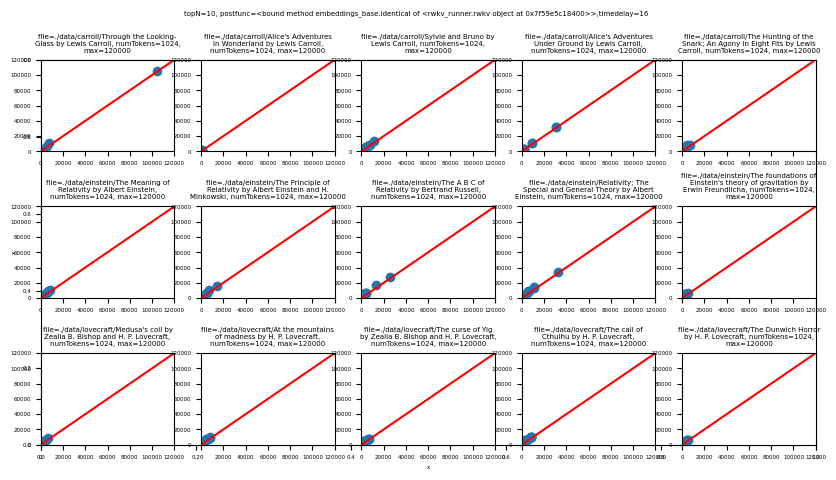

In [125]:
import rwkv_runner
importlib.reload(rwkv_runner)
from rwkv_runner import rwkv
r = rwkv(modelname,
         '20B_tokenizer.json',
         model_load=False)
r.numTokensList=[1024]
r.topN=10
r.all_pd_plot() # max_val = 120000

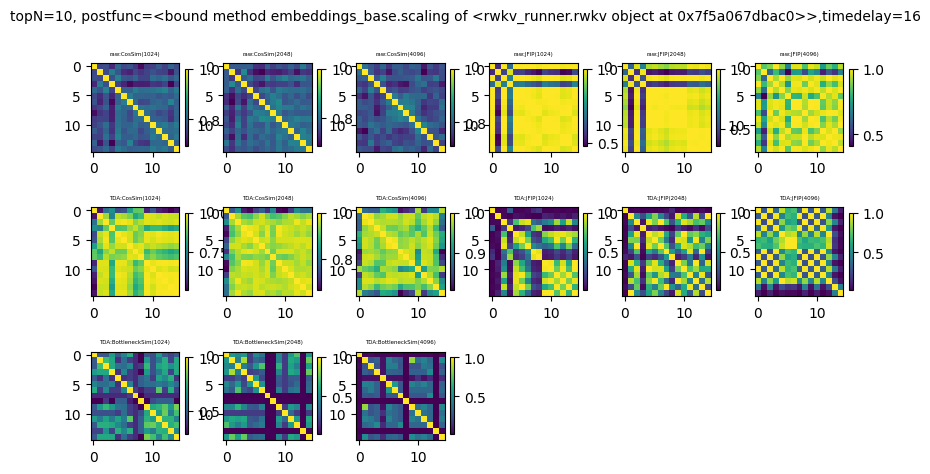

In [55]:
r.all_simMatrixPlot()

In [25]:
r.simMat(r.getRwkvEmbeddings, r.JFIP, 1024)

tensor([[1.0000, 0.5476, 0.9962, 0.6611, 0.9986, 0.9972, 0.9999, 0.9975, 0.9911,
         0.9964, 0.9996, 1.0000, 0.9887, 0.9924, 0.9948],
        [0.5476, 1.0000, 0.5882, 0.9727, 0.5725, 0.5828, 0.5409, 0.5155, 0.4885,
         0.5874, 0.5612, 0.5516, 0.4810, 0.4928, 0.5956],
        [0.9962, 0.5882, 1.0000, 0.7044, 0.9995, 0.9999, 0.9949, 0.9876, 0.9762,
         1.0000, 0.9984, 0.9969, 0.9723, 0.9783, 0.9999],
        [0.6611, 0.9727, 0.7044, 1.0000, 0.6878, 0.6987, 0.6538, 0.6259, 0.5958,
         0.7035, 0.6757, 0.6653, 0.5874, 0.6007, 0.7121],
        [0.9986, 0.5725, 0.9995, 0.6878, 1.0000, 0.9998, 0.9977, 0.9922, 0.9827,
         0.9995, 0.9997, 0.9990, 0.9793, 0.9845, 0.9988],
        [0.9972, 0.5828, 0.9999, 0.6987, 0.9998, 1.0000, 0.9959, 0.9893, 0.9785,
         1.0000, 0.9989, 0.9978, 0.9748, 0.9805, 0.9996],
        [0.9999, 0.5409, 0.9949, 0.6538, 0.9977, 0.9959, 1.0000, 0.9984, 0.9930,
         0.9950, 0.9990, 0.9997, 0.9907, 0.9941, 0.9932],
        [0.9975, 0.5155, 0.

[[1.         0.01642593 0.03259892 0.01642601 0.02177    0.01642592
  0.01642597 0.01642593 0.00682246 0.01642592 0.02176998 0.01642595
  0.016426   0.00326834 0.02176993]
 [0.01642597 1.         0.25987979 0.30864741 0.05178998 0.43890497
  0.34110766 0.27803709 0.00682246 0.84354764 0.37531105 0.44360851
  0.3369524  0.00326833 0.48675202]
 [0.03259898 0.2598801  1.         0.25988012 0.05179008 0.42029166
  0.42029181 0.25988014 0.00682241 0.25987989 0.25987999 0.40655535
  0.36660422 0.00326834 0.25988011]
 [0.01642595 0.3086472  0.25987967 1.         0.05178995 0.3246522
  0.30864707 0.29310553 0.00682243 0.30864741 0.30864718 0.30864721
  0.48675206 0.00326834 0.30864723]
 [0.02176999 0.05178983 0.0517901  0.05178987 1.         0.05179005
  0.05179006 0.05178995 0.00682244 0.05178994 0.14458441 0.05178999
  0.13088028 0.00326834 0.13088019]
 [0.01642595 0.43890461 0.42029182 0.32465208 0.05179008 1.
  0.53607964 0.27803718 0.00682241 0.44833144 0.37531085 0.44360833
  0.33695236 

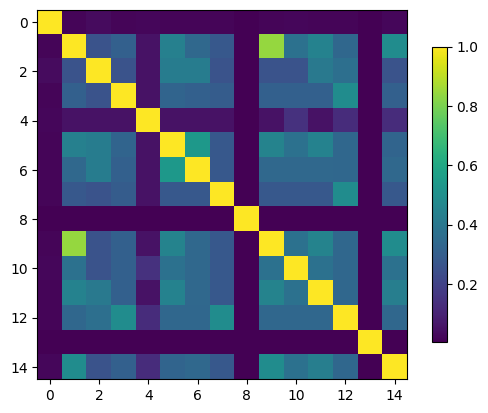

In [57]:
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

embFunc = r.getHeadPersistenceDiagramEmbeddings
simFunc = r.BottleneckSim
numTokens=4096
#c = r.db.deleteCache("simmat", embFunc=embFunc, simFunc=simFunc, numTokens=numTokens)
# jupyterからプーリングができないので，コマンドラインでキャッシュを作ってから確認すること
matrix=r.simMat(embFunc, simFunc, numTokens)
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cax = ax.imshow(matrix, cmap="viridis", origin="upper")
cbar = fig.colorbar(cax, shrink=0.8)

In [58]:
pd.DataFrame(matrix).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.082627,0.346070,0.284500,0.286305,0.123502,0.333675,0.310924,0.270954,0.072797,0.347014,0.305175,0.326002,0.323745,0.069717,0.319359
std,0.253869,0.287268,0.246098,0.245066,0.246165,0.257720,0.251398,0.243967,0.256505,0.287612,0.238859,0.253061,0.246157,0.257355,0.248198
min,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268
25%,0.016426,0.155835,0.155835,0.155835,0.051790,0.164914,0.164914,0.155835,0.006822,0.155835,0.202232,0.164913,0.233916,0.003268,0.195380
50%,0.016426,0.336953,0.259880,0.308647,0.051790,0.336953,0.341108,0.278037,0.006822,0.336952,0.336952,0.341108,0.336952,0.003268,0.324652
75%,0.021770,0.441256,0.386579,0.308647,0.091335,0.441257,0.341108,0.278037,0.006822,0.448331,0.375311,0.436583,0.351778,0.003268,0.402434
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
r.getAllScores()

[0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.36,
 0.44,
 0.3511111111111111,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.6177777777777778,
 0.52,
 0.5377777777777778,
 0.5644444444444444,
 0.6533333333333333,
 0.7333333333333333]

In [24]:
r.JFIP(np.array(dfs[0]).reshape(-1), np.array(dfs[3]).reshape(-1))

0.00023848332737114392

In [28]:
r.JFIP(np.array(dfs[0]).reshape(-1), np.array(dfs[6]).reshape(-1))

0.022904486621601217

In [35]:
dfs[0]

,0
0,512.470542
1,545.003132
2,846.254542
3,1357.438486
4,1415.779834
5,1487.983252
6,3595.379032
7,5805.533942
8,7722.641003
9,104654.442219


In [36]:
dfs[3]

,0
0,296.984230
1,438.480750
2,446.210959
3,462.155648
4,533.878218
5,568.881951
6,597.976799
7,688.005487
8,703.671609
9,1097.111333
